import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
credit_risk = pd.read_csv('REN_Bank.csv')
credit_risk.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [167]:
credit_risk.shape


(1000, 10)

In [168]:
credit_risk.size

10000

In [169]:
credit_risk.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [170]:

null_vals= credit_risk.isnull().sum()
null_vals[null_vals>0]


Saving accounts     183
Checking account    394
dtype: int64

In [171]:
credit_risk.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [172]:
credit_risk.describe(include= 'O')

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


### DATA TRANFORMATION

In [174]:
#credit_risk['Saving accounts'].mean() #you can't find the mean of a categorical value  

In [175]:
credit_risk['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [176]:
from sklearn.preprocessing import LabelEncoder  #imported label encoder #label encoder assigns categorical values with numerical values
enc=LabelEncoder()   #assigns label encoder to a variable
sa=credit_risk['Saving accounts'].dropna()
sa=enc.fit_transform(sa)
print(enc.classes_)
#sa.mean().round()


['little' 'moderate' 'quite rich' 'rich']


In [177]:
label_mapping = dict(zip(enc.classes_, range(len(enc.classes_))))
label_mapping 


{'little': 0, 'moderate': 1, 'quite rich': 2, 'rich': 3}

In [178]:
credit_risk['Saving accounts'] = credit_risk['Saving accounts'].fillna( value = 'little')
credit_risk['Saving accounts']

0        little
1        little
2        little
3        little
4        little
         ...   
995      little
996      little
997      little
998      little
999    moderate
Name: Saving accounts, Length: 1000, dtype: object

In [179]:
credit_risk['Saving accounts'].isnull().sum()

0

In [180]:
credit_risk['Saving accounts'].value_counts()

Saving accounts
little        786
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [181]:
ch=credit_risk['Checking account'].dropna()
ch=enc.fit_transform(ch)
print(enc.classes_)
ch.mean().round()


['little' 'moderate' 'rich']


1.0

In [182]:
label_mapping_gh = dict(zip(enc.classes_, range(len(enc.classes_))))
label_mapping 


{'little': 0, 'moderate': 1, 'quite rich': 2, 'rich': 3}

In [183]:
credit_risk['Checking account'] = credit_risk['Checking account'].fillna( value = 'moderate')
credit_risk['Checking account']

0        little
1      moderate
2      moderate
3        little
4        little
         ...   
995    moderate
996      little
997    moderate
998      little
999    moderate
Name: Checking account, Length: 1000, dtype: object

In [184]:
credit_risk['Checking account'].value_counts()


Checking account
moderate    663
little      274
rich         63
Name: count, dtype: int64

In [185]:
credit_risk['Checking account'].isnull().sum()

0

In [186]:
credit_risk.loc[credit_risk['Credit amount']== 18424.000000]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
915,915,32,female,3,own,little,moderate,18424,48,vacation/others


<Axes: xlabel='Unnamed: 0', ylabel='Credit amount'>

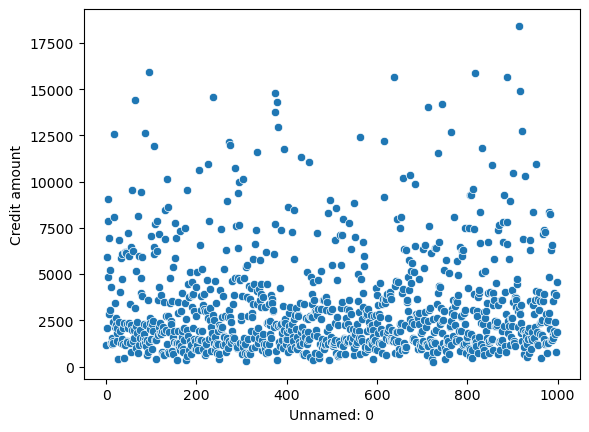

In [187]:
sns.scatterplot(x = 'Unnamed: 0', y= 'Credit amount', data = credit_risk)

In [188]:
def cred_score(score):
    if score < credit_risk['Credit amount'].mean():
       return 0
    elif score >  credit_risk['Credit amount'].mean():
       return 1


In [189]:
credit_risk['Credit_score'] = credit_risk['Credit amount'].apply(cred_score)
credit_risk['Credit_score'].head() 

0    0
1    1
2    0
3    1
4    1
Name: Credit_score, dtype: int64

In [190]:
credit_risk_ctgry = credit_risk.select_dtypes(include = 'O').columns.tolist()
credit_risk_ctgry = credit_risk[credit_risk_ctgry] 
credit_risk_ctgry

,Sex,Housing,Saving accounts,Checking account,Purpose
0,male,own,little,little,radio/TV
1,female,own,little,moderate,radio/TV
2,male,own,little,moderate,education
3,male,free,little,little,furniture/equipment
4,male,free,little,little,car
...,...,...,...,...,...
995,female,own,little,moderate,furniture/equipment
996,male,own,little,little,car
997,male,own,little,moderate,radio/TV
998,male,free,little,little,radio/TV


In [191]:
for cols in credit_risk_ctgry:
    print(cols)
    print(credit_risk_ctgry[cols].nunique())
    print(credit_risk_ctgry[cols].unique())
    print(credit_risk_ctgry[cols].value_counts())
    print('-'*50)

Sex
2
['male' 'female']
Sex
male      690
female    310
Name: count, dtype: int64
--------------------------------------------------
Housing
3
['own' 'free' 'rent']
Housing
own     713
rent    179
free    108
Name: count, dtype: int64
--------------------------------------------------
Saving accounts
4
['little' 'quite rich' 'rich' 'moderate']
Saving accounts
little        786
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64
--------------------------------------------------
Checking account
3
['little' 'moderate' 'rich']
Checking account
moderate    663
little      274
rich         63
Name: count, dtype: int64
--------------------------------------------------
Purpose
8
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
dome

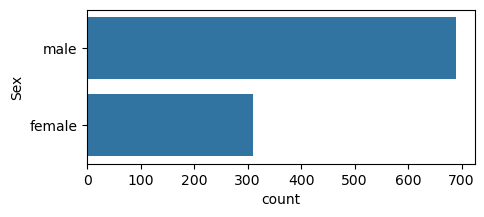

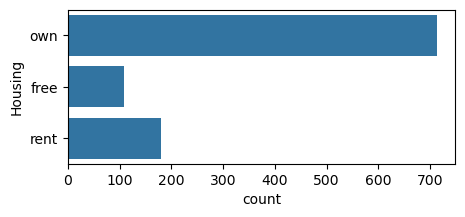

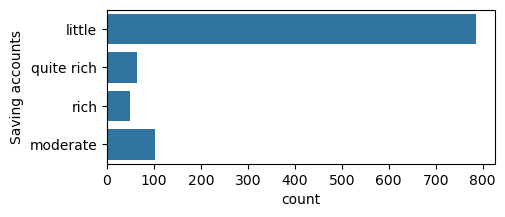

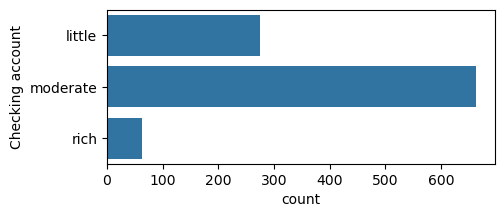

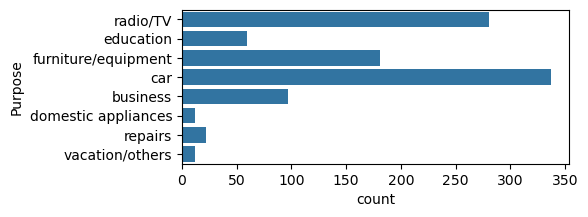

In [192]:
for cols in credit_risk_ctgry:
    plt.figure(figsize = (5,2))
    sns.countplot(credit_risk_ctgry[cols])

In [193]:
num_cols = credit_risk.select_dtypes(include = 'number').columns.tolist()
num_cols = credit_risk[num_cols].copy()
num_cols.head()

,Unnamed: 0,Age,Job,Credit amount,Duration,Credit_score
0,0,67,2,1169,6,0
1,1,22,2,5951,48,1
2,2,49,1,2096,12,0
3,3,45,2,7882,42,1
4,4,53,2,4870,24,1


In [194]:
np.sort(num_cols['Age'].unique())

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70,
       74, 75], dtype=int64)

In [195]:
num_cols['Age_cut']= pd.qcut(num_cols['Age'],8)
num_cols.groupby(['Age_cut'], observed =True, as_index = False)['Credit_score'].count()  #as_index = False prevents ['Age_cut'] from becoming an index


,Age_cut,Credit_score
0,"(18.999, 24.0]",149
1,"(24.0, 27.0]",142
2,"(27.0, 30.0]",120
3,"(30.0, 33.0]",105
4,"(33.0, 36.0]",111
5,"(36.0, 42.0]",138
6,"(42.0, 49.125]",110
7,"(49.125, 75.0]",125


In [196]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression # for Binary classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix # accuracy_score is for grading predictions. 

In [197]:
 #LogisticRegression().get_params()

In [198]:
credit_risk.columns


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose',
       'Credit_score'],
      dtype='object')

In [199]:
X = credit_risk[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration']]

In [200]:
y = credit_risk['Credit_score']

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 50)

In [202]:
cat = X.select_dtypes(include = 'O').columns.to_list()
cat

['Sex', 'Housing', 'Saving accounts', 'Checking account']

In [203]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 316 to 257
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               300 non-null    int64 
 1   Sex               300 non-null    object
 2   Job               300 non-null    int64 
 3   Housing           300 non-null    object
 4   Saving accounts   300 non-null    object
 5   Checking account  300 non-null    object
 6   Credit amount     300 non-null    int64 
 7   Duration          300 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 21.1+ KB


In [204]:
cat_features = ['Sex', 'Housing', 'Saving accounts', 'Checking account']
cat_features


['Sex', 'Housing', 'Saving accounts', 'Checking account']

In [205]:
num = X.select_dtypes(include = 'number').columns.to_list()
num

['Age', 'Job', 'Credit amount', 'Duration']

In [206]:
num_features = ['Age', 'Job', 'Credit amount', 'Duration']
num_features


['Age', 'Job', 'Credit amount', 'Duration']

In [208]:
cat_features = ['Sex', 'Housing', 'Saving accounts', 'Checking account']
num_features = ['Age', 'Job', 'Credit amount', 'Duration']
one_hot = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False )
scaler = StandardScaler()

In [210]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', Pipeline(steps = [
        ('one_hot',one_hot ),
        
    ]), cat_features),('num', Pipeline(steps=[
        ('scaler', scaler)
    ]),num_features)
                                              ] )
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Housing', 'Saving accounts',
                                  'Checking account']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Job', 'Credit amount', 'Duration'])])

In [212]:
preprocessor.fit_transform(X_train, X_test)

array([[ 0.        ,  1.        ,  1.        , ...,  0.11878277,
         1.01685485,  2.19467894],
       [ 0.        ,  1.        ,  0.        , ..., -1.3660019 ,
        -0.83377232,  0.23961207],
       [ 1.        ,  0.        ,  0.        , ...,  1.60356745,
        -0.74206354, -0.98230473],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.11878277,
         0.13722064,  1.2171455 ],
       [ 1.        ,  0.        ,  0.        , ..., -1.3660019 ,
         0.08891601, -0.73792137],
       [ 0.        ,  1.        ,  0.        , ...,  0.11878277,
        -0.19811147, -0.98230473]])

In [244]:
pipeline_1r = Pipeline(steps=
                       [('preprocessor', preprocessor),
                        ('model',LogisticRegression(C=1.0, max_iter = 100))
    
])
pipeline_1r

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Housing',
                                                   'Saving accounts',
                                                   'Checking account']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration'])])),
                ('model', LogisticRegression())])

In [246]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [248]:
pipeline_1r.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Housing',
                                                   'Saving accounts',
                                                   'Checking account']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration'])])),
                ('model', LogisticRegression())])

In [250]:
y_pred = pipeline_1r.predict(X_test)
y_pred


array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0], d

In [252]:
print(accuracy_score (y_pred,y_test)) 

0.9766666666666667


In [253]:
print(confusion_matrix(y_pred,y_test)) 

[[203   7]
 [  0  90]]
